In [1]:
import os
os.chdir(r'C:\Users\limso\Desktop\School\BAN612 Data Analytics')
import pandas as pd
df=pd.read_csv('output.csv')
#Add new column for Price per square foot 
def removesym(string):
    string=string.replace(',','')
    return int(string)
df['Sq Ft'] = df['Sq Ft'].apply(lambda x: removesym(x))
df['PSF'] = df.apply(lambda x:float(x['Price'])/float(x['Sq Ft']),axis=1)
df

,Unnamed: 0,Property Address,City,Zip Code,Agent,For Sale,Price,Beds,Baths,Half Baths,Sq Ft,County,PSF
0,0,110/112 San Antonio AVE,San Bruno,94066,Better Homes and Gardens Real Estate J.F. Finn...,FOR SALE,1299999,3,3,0,1490,san-mateo-county,872.482550
1,1,1084 Park Pacifica Avenue,Pacifica,94044,Keller Williams East County,FOR SALE,1228000,3,2,0,1080,san-mateo-county,1137.037037
2,2,2107 Shoreview Ave,San Mateo,94401,REALTY EXPERTS,FOR SALE,289000,2,2,0,992,san-mateo-county,291.330645
3,3,3015 E. Bayshore Rd. #439,Redwood City,94063,Alliance Manufactured Homes,FOR SALE,949950,2,2,0,1213,san-mateo-county,783.140973
4,4,800 Sea Spray Lane Unit 212,Foster City,94404,None,FOR SALE,3198000,5,5,1,3918,san-mateo-county,816.232772
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,166,1416 Casa Grande Road,Petaluma,94954,None,FOR SALE,820000,3,2,0,2007,sonoma-county,408.570005
147,167,2869 Spyglass Court,Santa Rosa,95405,None,FOR SALE,329000,2,1,0,828,sonoma-county,397.342995
148,168,3851 Sebastopol Road #104,Santa Rosa,95407,Coldwell Banker Santa Rosa - Bicentennial,FOR SALE,202000,3,2,0,1296,sonoma-county,155.864198
149,169,300 Candy Ln #59,Santa Rosa,95403,Coldwell Banker Santa Rosa - Bicentennial,FOR SALE,779000,2,2,0,1502,sonoma-county,518.641811


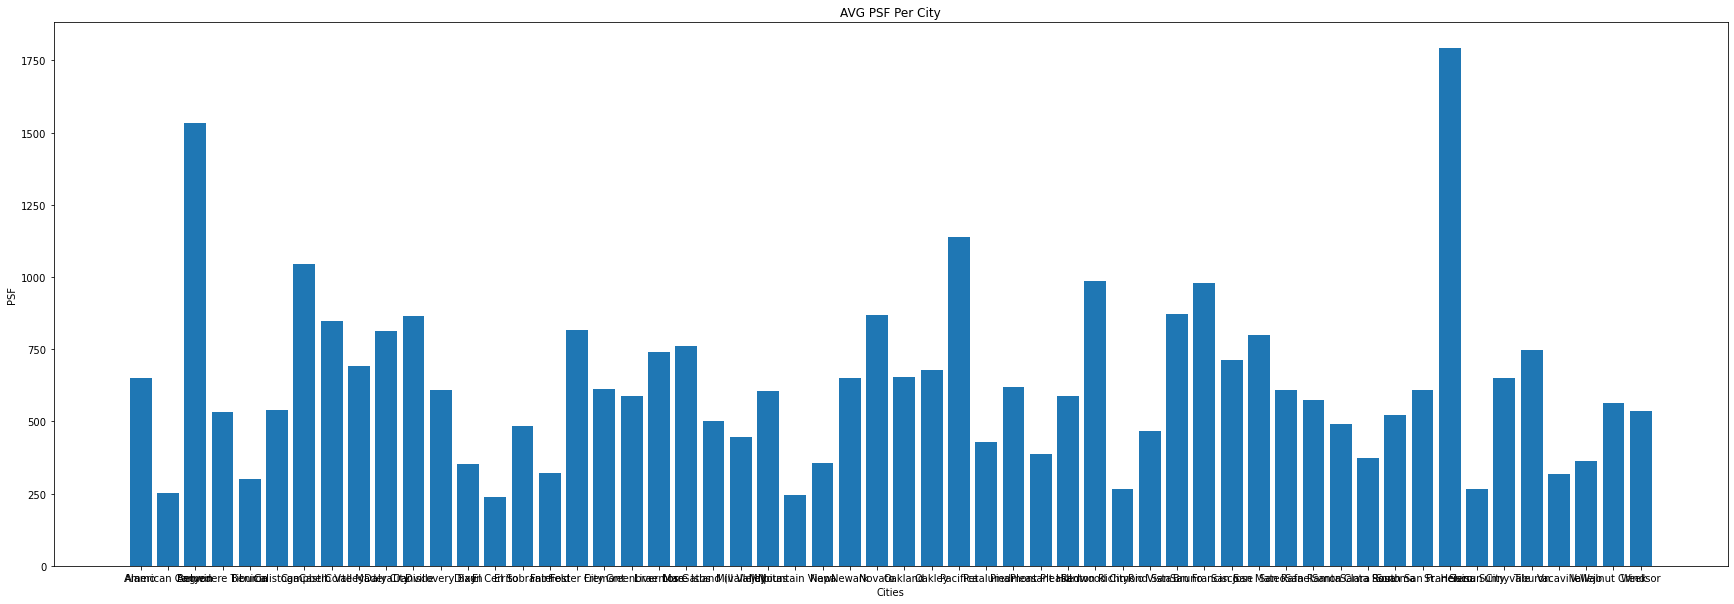

In [7]:
#First Research Question: Shows avg Price per square foot (PSF) per city bar chart 

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,10)
PSF_City=df.groupby("City")["PSF"].mean()
x = PSF_City.index.values
y = PSF_City.values
 
plt.bar(x, y, align='center')
# plt.xticks(y_pos, x)
plt.xlabel('Cities')
plt.ylabel('PSF')
plt.title('AVG PSF Per City')
 
plt.show()

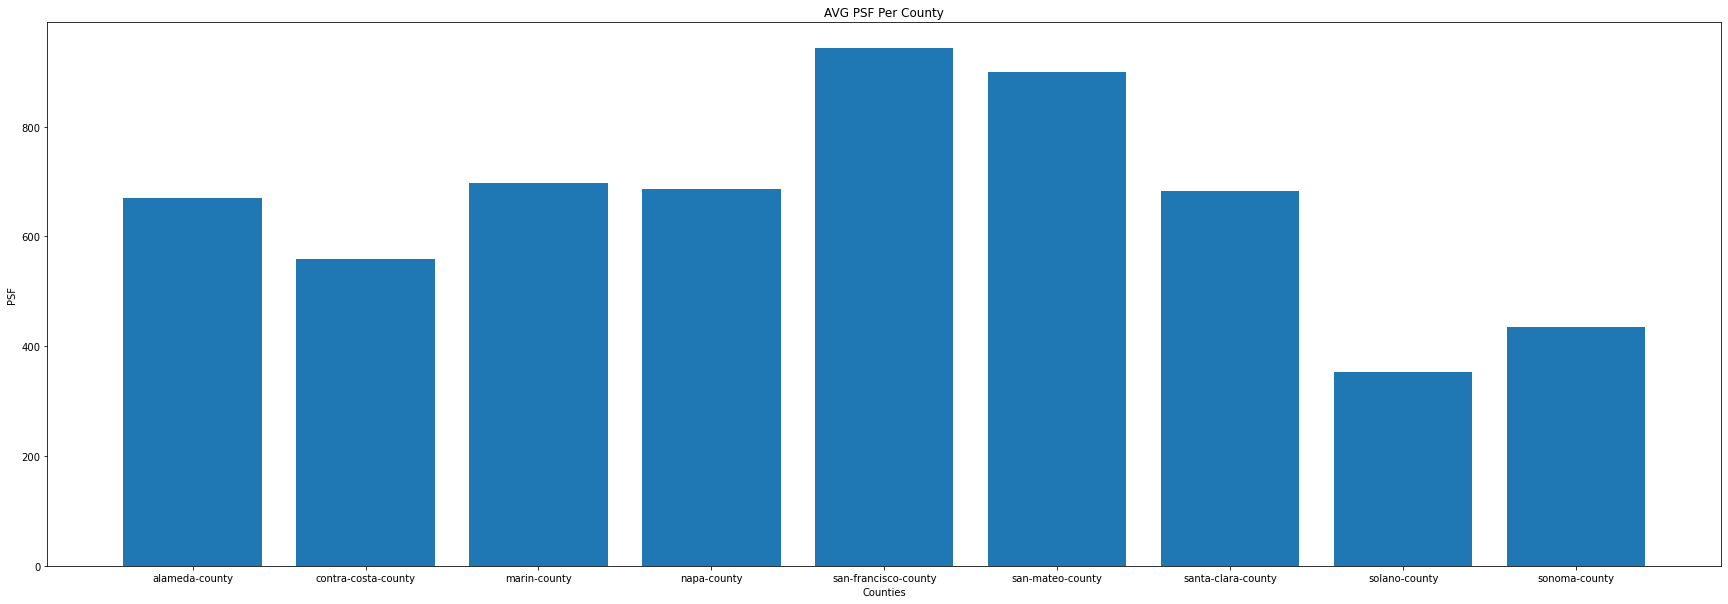

In [54]:
#Second Research Question: Shows avg Price per square foot (PSF) per county bar chart 
PSF_City=df.groupby("County")["PSF"].mean()
x = PSF_City.index.values
y = PSF_City.values
 
plt.bar(x, y, align='center')
# plt.xticks(y_pos, x)
plt.xlabel('Counties')
plt.ylabel('PSF')
plt.title('AVG PSF Per County')
 
plt.show()

In [8]:
#Third Research Question: Run a Neural Network model and predict pricing
#Data Cleaning

price = df['Price']
NN_df = df[['Beds','Baths','Half Baths','Sq Ft']] #Using these variables for prediction

from sklearn import preprocessing #Normalize all input variables

min_max_scaler = preprocessing.MinMaxScaler()
def scaler(dataframe):
    df_scaled = min_max_scaler.fit_transform(dataframe)
    df_normalized = pd.DataFrame(df_scaled)
    return df_normalized

NN_df = scaler(NN_df)
NN_df

,0,1,2,3
0,0.2,0.50,0.0,0.119444
1,0.2,0.25,0.0,0.053176
2,0.0,0.25,0.0,0.038953
3,0.0,0.25,0.0,0.074673
4,0.6,1.00,1.0,0.511880
...,...,...,...,...
146,0.2,0.25,0.0,0.203006
147,0.0,0.00,0.0,0.012445
148,0.2,0.25,0.0,0.088088
149,0.0,0.25,0.0,0.121384


In [9]:
#NN Model Building
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import optimizers

model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=4))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.Dense(512))
model.add(tf.keras.layers.Dense(1, activation='relu'))
model.compile(loss='mse', metrics=['mae'], optimizer='rmsprop')
print(model.summary())

Using TensorFlow backend.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                160       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_4 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 513       
Total params: 175,713
Trainable params: 175,713
Non-trainable params: 0
__________________________________________________

In [10]:
#Train Model
history = model.fit(x=NN_df,y=price,batch_size=1,epochs=5,validation_split=0.15)

Train on 128 samples, validate on 23 samples
Epoch 1/5
128/128 [==============================] - 3s 21ms/sample - loss: 2107273391738.0000 - mae: 1125391.2500 - val_loss: 293761873770.0435 - val_mae: 373756.5312
Epoch 2/5
128/128 [==============================] - 1s 5ms/sample - loss: 654282692299.1094 - mae: 477789.8438 - val_loss: 285433723597.9130 - val_mae: 474733.4688
Epoch 3/5
128/128 [==============================] - 1s 5ms/sample - loss: 596543658565.3516 - mae: 491440.1250 - val_loss: 338642426134.2609 - val_mae: 517286.1250
Epoch 4/5
128/128 [==============================] - 1s 6ms/sample - loss: 585099009105.8750 - mae: 484963.7500 - val_loss: 227319585729.3913 - val_mae: 392336.4688
Epoch 5/5
128/128 [==============================] - 1s 5ms/sample - loss: 613006664020.0684 - mae: 474699.0625 - val_loss: 275445832673.7391 - val_mae: 464013.1875


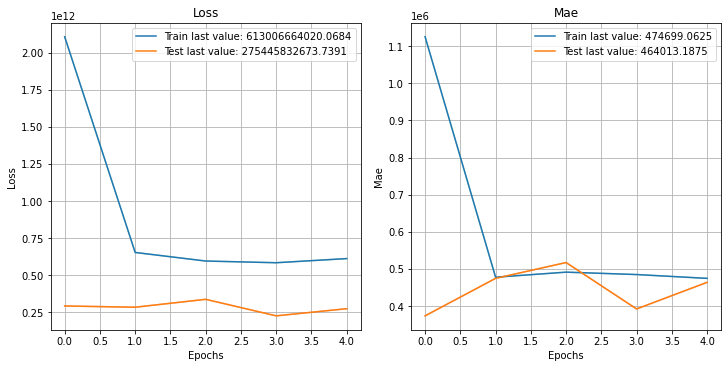

In [11]:
from plot_keras_history import plot_history
plot_history(history, path="Neural_model.png", interpolate=True)
plt.show()
plt.close()
